In [81]:
import scipy as sp
import numpy as np



In [82]:
n = range(2)
for i in n :
    print(i)

0
1


In [83]:
# create a class that generate random data for bayesian A/B testing framework

class bayes_AB:
    
    def __init__(self,no_of_clusters,samples_per_cluster, ratios, experiment_ratio,iterations):
        self.no_of_clusters = no_of_clusters
        self.samples_per_cluster = samples_per_cluster
        self.ratios =ratios
        self.experiment_ratio = experiment_ratio
        self.iterations= iterations
        
    def generate(self):
        ex_n = self.samples_per_cluster*self.experiment_ratio
        con_n = self.samples_per_cluster - ex_n
        ratios_res = np.zeros((self.iterations,2,self.no_of_clusters,2))
       
        for num in range(self.iterations):
            
            for i in range(self.no_of_clusters):
                n = np.random.binomial(ex_n,self.ratios[0][i])
                n2 = np.random.binomial(con_n, self.ratios[1][i])
                
                if(num==0):
            
                    ratios_res[num][0][i][0]=1+n
                    ratios_res[num][0][i][1]=1+ ex_n-n
                
                    ratios_res[num][1][i][0]=1+n2
                    ratios_res[num][1][i][1]=1+ con_n-n2
                
                else:
                    
                    ratios_res[num][0][i][0]=ratios_res[num-1][0][i][0]+n
                    ratios_res[num][0][i][1]=ratios_res[num-1][0][i][1]+ ex_n-n
                
                    ratios_res[num][1][i][0]=n2 + ratios_res[num-1][1][i][0]
                    ratios_res[num][1][i][1]=con_n-n2 +ratios_res[num-1][1][i][1]
                    
            
        return ratios_res
    
           

In [84]:
ratios = np.array([[0.3,0.4],[0.25,0.3]])
AB1 =bayes_AB(2,200,ratios,0.4,100)


In [85]:
res = AB1.generate()

In [86]:
res[0][0]

array([[ 27.,  55.],
       [ 22.,  60.]])

In [87]:
import matplotlib.pyplot as plt
import scipy.stats as stats

In [88]:
%matplotlib inline



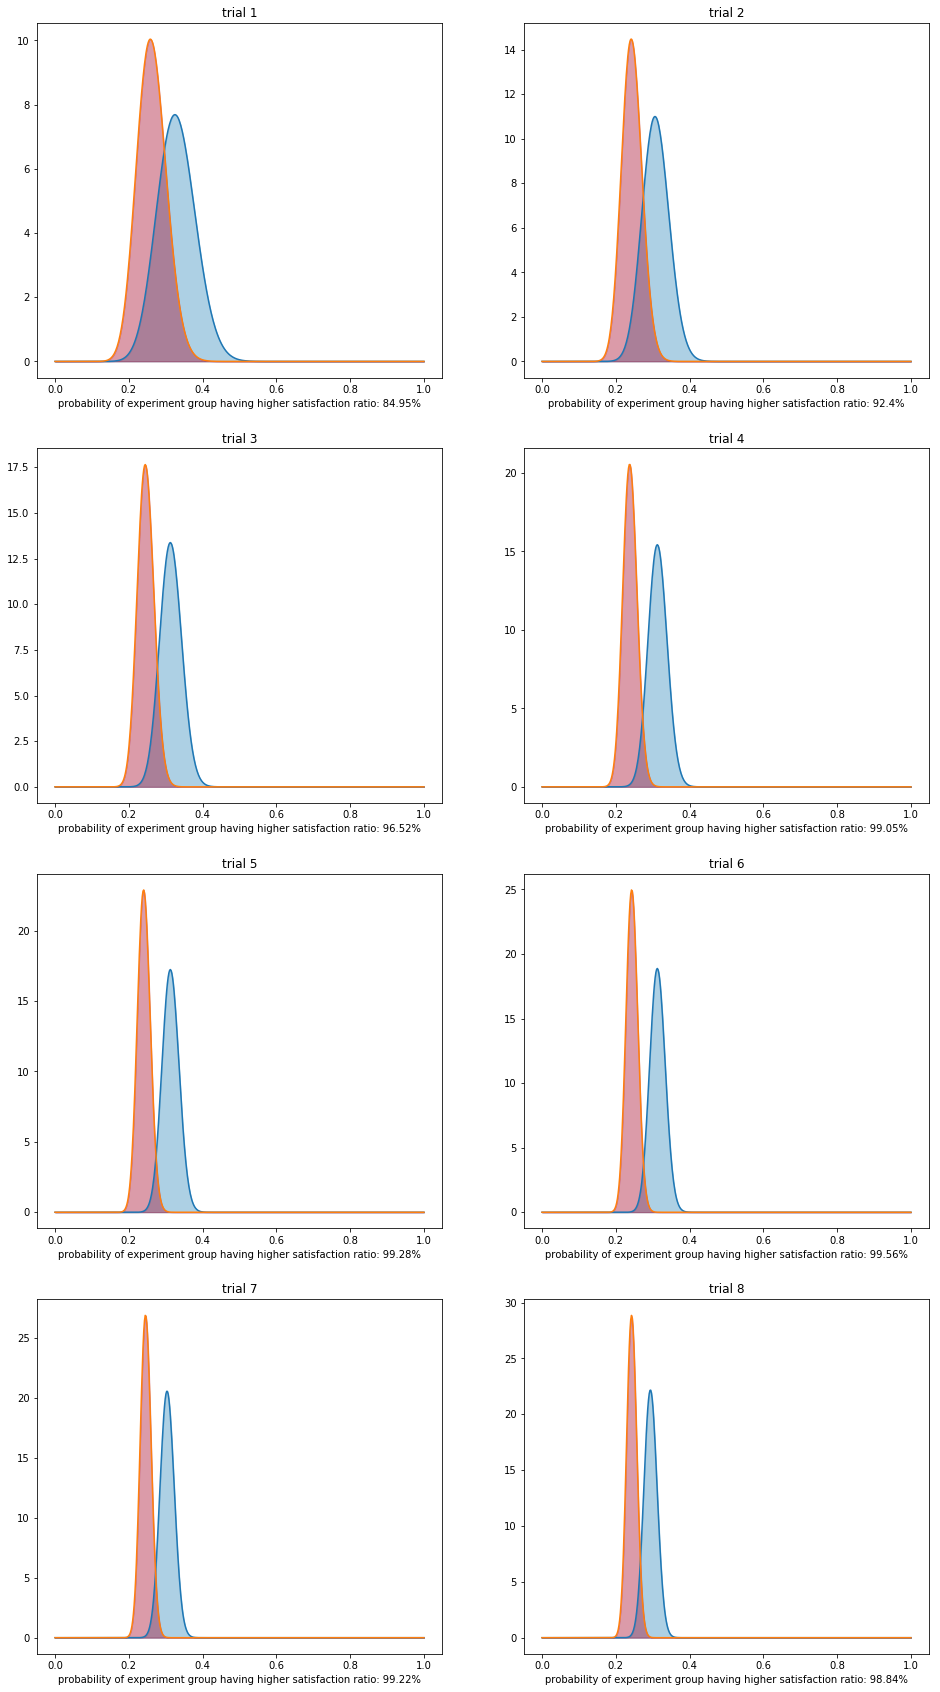

In [94]:
x = np.linspace(0,1,500)
from IPython.core.pylabtools import figsize

figsize(16,30)

for t in range(8):
    y = stats.beta.pdf(x,res[t][0][0][0],res[t][0][0][1])
    y2 = stats.beta.pdf(x,res[t][1][0][0],res[t][1][0][1])
    n = 0
    for i in range(20000):
        n+=1 if stats.beta.rvs(res[t][0][0][0],res[t][0][0][1]) > stats.beta.rvs(res[t][1][0][0],res[t][1][0][1]) else 0
    
    greater = np.round(n/20000*100,2)
    
    ax = plt.subplot(4,2,t+1)
    plt.plot(x,y)
    plt.plot(x,y2)
    plt.fill_between(x,0,y,color="#348ABD", alpha=0.4, label='experiment group')
    plt.fill_between(x,0,y2,color="#A60628", alpha=0.4, label='control group')
    plt.title("week %d" % (t+1))
    plt.xlabel("probability of experiment group having higher satisfaction ratio: "+ str(greater) +'%')
    
